# 22.1 K均值聚类

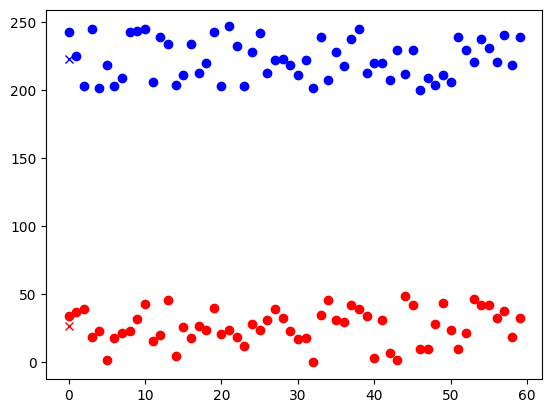

In [1]:
import numpy as np

import cv2

from matplotlib import pyplot as plt

# 随机生成两组数组

# 生成60个值在[0,50]内的xiaoMI直径数据

xiaoMI=np.random.randint(0,50,60)

# 生成60个值在[200,250]内的daMI直径数据

daMI=np.random.randint(200,250,60)

# 将xiaoMI和daMI组合为MI

MI=np.hstack((xiaoMI,daMI))

# 使用reshape函数将其转换为(120,1)

MI=MI.reshape((120,1))

# 将MI转换为float32类型

MI=np.float32(MI)

# 调用kmeans模块

# 设置参数criteria的值

criteria=(cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER,10,1.0)

# 设置参数flags的值

flags=cv2.KMEANS_RANDOM_CENTERS

# 调用函数kmeans

retval,bestLabels,centers=cv2.kmeans(MI,2,None,criteria,10,flags)

'''

# 打印返回值

print(retval)

print(bestLabels)

print(centers)

'''

# 获取分类结果

XM=MI[bestLabels==0]

DM=MI[bestLabels==1]

# 绘制分类结果

# 绘制原始数据

plt.plot(XM,'ro')

plt.plot(DM,'bo')

# 绘制中心点

plt.plot(centers[0],'rx')

plt.plot(centers[1],'bx')

plt.show()

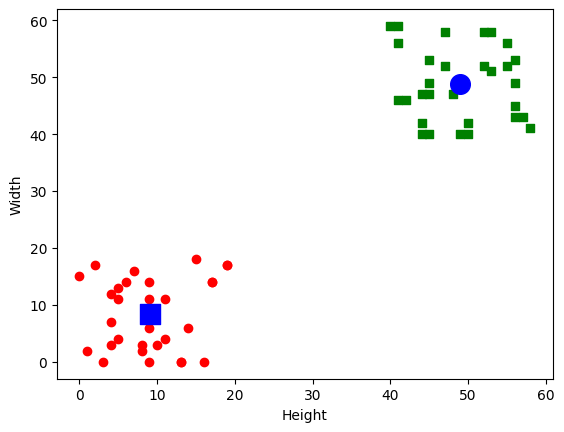

In [2]:
import numpy as np

import cv2

from matplotlib import pyplot as plt

# 随机生成两组数值

# xiaomi组，长和宽都在[0,20]内

xiaomi=np.random.randint(0,20,(30,2))
#dami组，长和宽的大小都在[40,60]

dami=np.random.randint(40,60,(30,2))

# 组合数据

MI=np.vstack((xiaomi,dami))

# 转换为float32类型

MI=np.float32(MI)

# 调用kmeans模块

# 设置参数criteria值

criteria=(cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER,10,1.0)

# 调用kmeans函数

ret,label,center=cv2.kmeans(MI,2,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

'''

#打印返回值

print(ret)

print(label)

print(center)

'''

# 根据kmeans的处理结果，将数据分类，分为XM和DM两大类

XM=MI[label.ravel()==0]

DM=MI[label.ravel()==1]

# 绘制分类结果数据及中心点

plt.scatter(XM[:,0],XM[:,1],c='g',marker='s')

plt.scatter(DM[:,0],DM[:,1],c='r',marker='o')

plt.scatter(center[0,0],center[0,1],s=200,c='b',marker='o')

plt.scatter(center[1,0],center[1,1],s=200,c='b',marker='s')

plt.xlabel('Height'),plt.ylabel('Width')

plt.show()

(-0.5, 511.5, 511.5, -0.5)

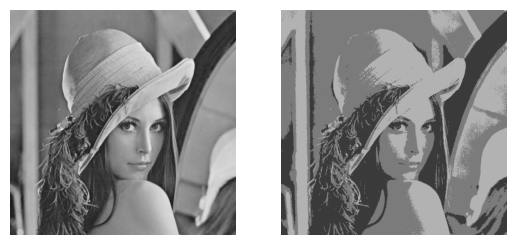

In [3]:
import numpy as np

import cv2

import matplotlib.pyplot as plt

# 读取待处理图像

img=cv2.imread('../images/lena.bmp')

# 使用reshape将一个像素点的RGB值作为一个单元处理

data=img.reshape((-1,3))

# 转换为kmeans可以处理的类型
data=np.float32(data)

# 调用kmeans模块

criteria=(cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER,10,1.0)

K=3

ret,label,center=cv2.kmeans(data,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

# 转换为uint8数据类型，将每个像素点都赋值为当前分类的中心点像素值

# 将center的值转换为uint8

center=np.uint8(center)

# 使用center内的值替换原像素点的值

res1=center[label.flatten()]

# 使用reshape调整替换后的图像

res2=res1.reshape((img.shape))

# 显示处理结果

plt.subplot(121)

plt.imshow(img)

plt.axis('off')

plt.subplot(122)

plt.imshow(res2)
plt.axis('off')